### AlexNet

In [2]:
import torch 
from torch import nn
from d2l import torch as d2l

In [3]:
net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size = 11, stride = 4, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),
    nn.Conv2d(96,256,kernel_size = 5, padding = 2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), 
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 3, stride = 2),
    nn.Flatten(),
    nn.Linear(6400,4096),
    nn.ReLU(),
    nn.Dropout(p = 0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(p = 0.5),
    nn.Linear(4096,10)
)

In [4]:
X = torch.randn(1,1,224,224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:',X.shape)

Conv2d output shape: torch.Size([1, 96, 54, 54])
ReLU output shape: torch.Size([1, 96, 54, 54])
MaxPool2d output shape: torch.Size([1, 96, 26, 26])
Conv2d output shape: torch.Size([1, 256, 26, 26])
ReLU output shape: torch.Size([1, 256, 26, 26])
MaxPool2d output shape: torch.Size([1, 256, 12, 12])
Conv2d output shape: torch.Size([1, 384, 12, 12])
ReLU output shape: torch.Size([1, 384, 12, 12])
Conv2d output shape: torch.Size([1, 384, 12, 12])
ReLU output shape: torch.Size([1, 384, 12, 12])
Conv2d output shape: torch.Size([1, 256, 12, 12])
ReLU output shape: torch.Size([1, 256, 12, 12])
MaxPool2d output shape: torch.Size([1, 256, 5, 5])
Flatten output shape: torch.Size([1, 6400])
Linear output shape: torch.Size([1, 4096])
ReLU output shape: torch.Size([1, 4096])
Dropout output shape: torch.Size([1, 4096])
Linear output shape: torch.Size([1, 4096])
ReLU output shape: torch.Size([1, 4096])
Dropout output shape: torch.Size([1, 4096])
Linear output shape: torch.Size([1, 10])


In [5]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.330, train acc 0.879, test acc 0.880
1561.8 examples/sec on cuda:0


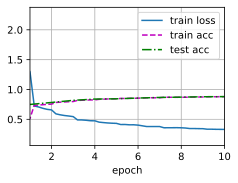

In [6]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### VGG

In [8]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels,out_channels,kernel_size = 3, padding = 1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2))
    return nn.Sequential(*layers)

In [9]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [10]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.Linear(out_channels * 7 * 7, 4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096,10)
    )

net = vgg(conv_arch)

In [11]:
X = torch.randn(size = (1,1,224,224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [12]:
# 构建了一个通道数较少的网络
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

loss 0.178, train acc 0.934, test acc 0.916
928.2 examples/sec on cuda:0


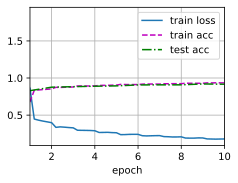

In [13]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### NiN

In [15]:
import torch
from torch import nn
from d2l import torch as d2l

In [16]:
def nin_block(in_channels, out_channels,kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU()
    )

In [17]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小,10)
    nn.Flatten()
)

In [18]:
X = torch.rand(size = (1,1,224,224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape', X.shape)

Sequential output shape torch.Size([1, 96, 54, 54])
MaxPool2d output shape torch.Size([1, 96, 26, 26])
Sequential output shape torch.Size([1, 256, 26, 26])
MaxPool2d output shape torch.Size([1, 256, 12, 12])
Sequential output shape torch.Size([1, 384, 12, 12])
MaxPool2d output shape torch.Size([1, 384, 5, 5])
Dropout output shape torch.Size([1, 384, 5, 5])
Sequential output shape torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape torch.Size([1, 10, 1, 1])
Flatten output shape torch.Size([1, 10])


In [19]:
print(net.parameters)

<bound method Module.parameters of Sequential(
  (0): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
 

loss 0.322, train acc 0.879, test acc 0.876
1509.4 examples/sec on cuda:0


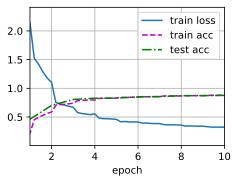

In [20]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### GoogLeNet

In [22]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [23]:
class Inception(nn.Module):
    def __init__(self, in_channels, c1,c2,c3,c4,**kwargs):
        super(Inception,self).__init__(**kwargs)
        self.p1_1 = nn.Conv2d(in_channels,c1,kernel_size = 1)

        self.p2_1 = nn.Conv2d(in_channels,c2[0],kernel_size = 1)
        self.p2_2 = nn.Conv2d(c2[0],c2[1],kernel_size = 3, padding = 1)

        self.p3_1 = nn.Conv2d(in_channels,c3[0],kernel_size = 1)
        self.p3_2 = nn.Conv2d(c3[0],c3[1],kernel_size = 5, padding = 2)

        self.p4_1 = nn.MaxPool2d(kernel_size = 3, stride = 1,padding = 1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size = 1)
    
    def forward(self,x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))

        return torch.cat((p1,p2,p3,p4),dim = 1)

In [24]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
 nn.ReLU(),
 nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [25]:
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
 nn.ReLU(),
 nn.Conv2d(64, 192, kernel_size=3, padding=1),
 nn.ReLU(),
 nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [26]:
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
        Inception(256, 128, (128, 192), (32, 96), 64),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [27]:
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
        Inception(512, 160, (112, 224), (24, 64), 64),
        Inception(512, 128, (128, 256), (24, 64), 64),
        Inception(512, 112, (144, 288), (32, 64), 64),
        Inception(528, 256, (160, 320), (32, 128), 128),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [28]:
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
 Inception(832, 384, (192, 384), (48, 128), 128),
 nn.AdaptiveAvgPool2d((1,1)),
 nn.Flatten())

In [29]:
net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

In [30]:
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


loss 0.245, train acc 0.907, test acc 0.883
1814.8 examples/sec on cuda:0


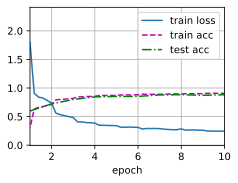

In [31]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### Batch Normalization

In [62]:
import torch
from torch import nn
from d2l import torch as d2l

In [64]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    if not torch.is_grad_enabled():
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else :
        assert len(X.shape) in (2,4)
        # 全连接层
        if len(X.shape) == 2:
            mean = X.mean(dim = 0)
            var = ((X - mean) ** 2).mean(dim = 0)
        else :
            # 二维卷积层
            mean = X.mean(dim = (0,2,3),keepdim = True) #在每个通道上分别求和
            var = ((X -mean) ** 2).mean(dim = (0,2,3), keepdim = True)
        X_hat = (X - mean) / torch.sqrt(var + eps)
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta
    return Y, moving_mean.data, moving_var.data
            

In [66]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else :
            shape = (1, num_features,1,1)
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)
    def forward(self,X):
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean, self.moving_var,
            eps = 1e-5,momentum = 0.9)
        return Y
        

In [68]:
net = nn.Sequential(
 nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
 nn.AvgPool2d(kernel_size=2, stride=2),
 nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
 nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
 nn.Linear(16*4*4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
 nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
 nn.Linear(84, 10))

loss 0.268, train acc 0.901, test acc 0.873
23232.8 examples/sec on cuda:0


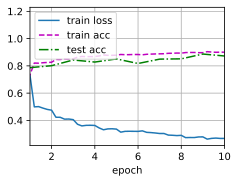

In [70]:
lr, num_epochs, batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [72]:
net[1].gamma.reshape((-1,)), net[1].beta.reshape((-1,))

(tensor([3.1128, 2.0552, 2.4031, 3.8391, 3.6788, 2.0312], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([ 2.6593, -2.4037,  0.7443, -2.1381, -2.1090,  2.2140], device='cuda:0',
        grad_fn=<ViewBackward0>))

In [73]:
# 直接使用pytorch的BatchNorm
net = nn.Sequential(
 nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
 nn.AvgPool2d(kernel_size=2, stride=2),
 nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
 nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
 nn.Linear(256, 120), nn.BatchNorm1d(120), nn.Sigmoid(),
 nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(),
 nn.Linear(84, 10))

loss 0.278, train acc 0.896, test acc 0.878
41393.9 examples/sec on cuda:0


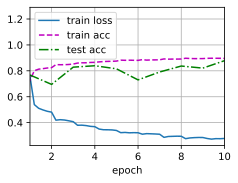

In [76]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### ResNet

In [78]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [79]:
class Residual(nn.Module):
    def __init__(self, input_channels, num_channels, 
                 use_1x1conv = False,strides = 1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size = 3, padding = 1, stride = strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                                kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size = 1,stride = strides)
        else :
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self,X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)
    

In [80]:
blk = Residual(3,3)
X = torch.rand(4,3,6,6)
Y = blk(X)
Y.shape

torch.Size([4, 3, 6, 6])

In [81]:
blk = Residual(3,6,use_1x1conv = True,strides = 2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [82]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
 nn.BatchNorm2d(64), nn.ReLU(),
 nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [83]:
def resnet_block(input_channels, num_channels, num_residuals,first_block = False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                           use_1x1conv = True, strides = 2))
        else :
            blk.append(Residual(num_channels, num_channels))
    return blk

In [84]:
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))

In [85]:
net = nn.Sequential(b1, b2, b3, b4, b5,
 nn.AdaptiveAvgPool2d((1,1)),
 nn.Flatten(), nn.Linear(512, 10))

In [86]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 28, 28])
Sequential output shape:	 torch.Size([1, 256, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


loss 0.007, train acc 0.999, test acc 0.913
2612.0 examples/sec on cuda:0


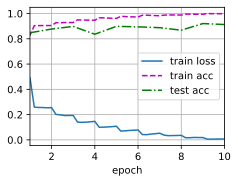

In [87]:
lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

### DenseNet

In [89]:
import torch
from torch import nn
from d2l import torch as d2l

In [90]:
def conv_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels),
        nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size = 3, padding = 1)
    )
    

In [91]:
# 稠密快
class DenseBlock(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock,self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels * i + input_channels,num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self,X):
        for blk in self.net:
            Y = blk(X)
            X = torch.cat((X,Y), dim = 1)
        return X

In [92]:
blk = DenseBlock(2,3,10)
X = torch.randn(4,3,8,8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [93]:
# 过渡层
def transition_block(input_channels, num_channels):
    return nn.Sequential(
     nn.BatchNorm2d(input_channels), nn.ReLU(),
     nn.Conv2d(input_channels, num_channels, kernel_size=1),
     nn.AvgPool2d(kernel_size=2, stride=2))

In [94]:
blk = transition_block(23, 10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

In [95]:
b1 = nn.Sequential(
 nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
 nn.BatchNorm2d(64), nn.ReLU(),
 nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [96]:
# num_channels为当前的通道数
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4, 4, 4, 4]
blks = []
for i, num_convs in enumerate(num_convs_in_dense_blocks):
    blks.append(DenseBlock(num_convs, num_channels, growth_rate))
    # 上一个稠密块的输出通道数
    num_channels += num_convs * growth_rate
    # 在稠密块之间添加一个转换层，使通道数量减半
    if i != len(num_convs_in_dense_blocks)- 1:
        blks.append(transition_block(num_channels, num_channels // 2))
        num_channels = num_channels // 2

In [97]:
net = nn.Sequential(
 b1, *blks,
 nn.BatchNorm2d(num_channels), nn.ReLU(),
 nn.AdaptiveAvgPool2d((1, 1)),
 nn.Flatten(),
 nn.Linear(num_channels, 10))

loss 0.143, train acc 0.948, test acc 0.843
2469.4 examples/sec on cuda:0


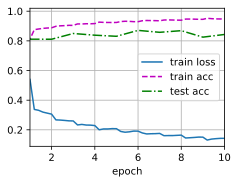

In [98]:
lr, num_epochs, batch_size = 0.1, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())